In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Importing the dataset

In [45]:
df=pd.read_csv("titanic-passengers.csv",encoding="ISO-8859-1",sep=';')

In [46]:
print("Titanic passengers\n")
print(df.head())

Titanic passengers

   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  


# General Informations

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
None


# Preprocessing

In [48]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [49]:
df['Age'].fillna(df['Age'].median(),inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [50]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [51]:
df['Embarked'].fillna('S',inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [52]:
df=df.drop(['Cabin'],axis=1)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [53]:
print("Missing values: ",df.isnull().sum().sum())

Missing values:  0


# Categorical to Numerical

In [54]:
encoder=LabelEncoder()
embarked={'S':0,'C':1,'Q':2}
df.replace(embarked,inplace=True)
df['Survived']=encoder.fit_transform(df['Survived'])
df['Sex']=encoder.fit_transform(df['Sex'])
print(df.head())

   PassengerId  Survived  Pclass                                         Name  \
0          343         0       2                   Collander, Mr. Erik Gustaf   
1           76         0       3                      Moen, Mr. Sigurd Hansen   
2          641         0       3                       Jensen, Mr. Hans Peder   
3          568         0       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672         0       1                       Davidson, Mr. Thornton   

   Sex   Age  SibSp  Parch      Ticket     Fare  Embarked  
0    1  28.0      0      0      248740  13.0000         0  
1    1  25.0      0      0      348123   7.6500         0  
2    1  20.0      0      0      350050   7.8542         0  
3    0  29.0      0      4      349909  21.0750         0  
4    1  31.0      1      0  F.C. 12750  52.0000         0  


#  Data Visualization 

<AxesSubplot:>

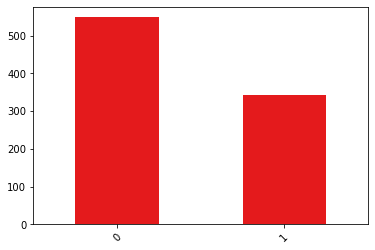

In [100]:
vc=df["Survived"].value_counts()
vc.plot.bar(rot=45,colormap="Set1")

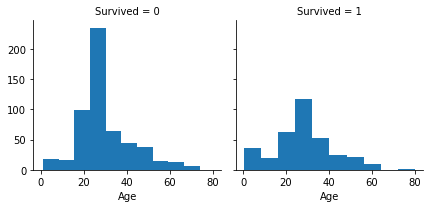

In [56]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age')
g.add_legend()

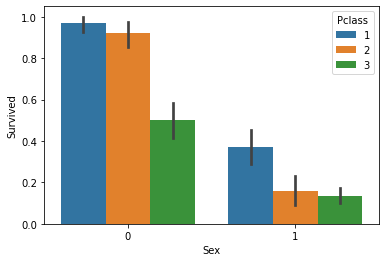

In [77]:
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=df);

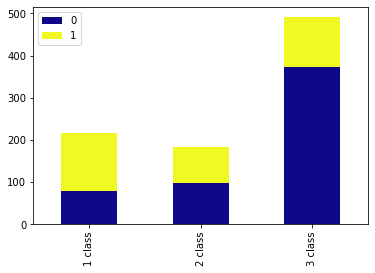

In [84]:
c1 = df.loc[df['Pclass']==1, :]['Survived'].value_counts()
c2     = df.loc[df['Pclass']==2, :]['Survived'].value_counts()
c3    = df.loc[df['Pclass']==3, :]['Survived'].value_counts()
df_plot  = pd.DataFrame([c1,c2,c3])
df_plot.index=['1 class','2 class','3 class']
df_plot.plot(kind='bar',stacked=True,colormap="plasma");

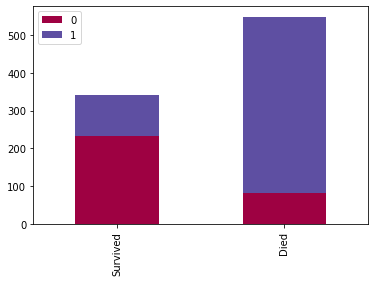

In [102]:
survived = df.loc[df['Survived']==1, :]['Sex'].value_counts()
died     = df.loc[df['Survived']==0, :]['Sex'].value_counts()
df_plot  = pd.DataFrame([survived,died])
df_plot.index=['Survived','Died']
df_plot.plot(kind='bar',stacked=True, colormap='Spectral');

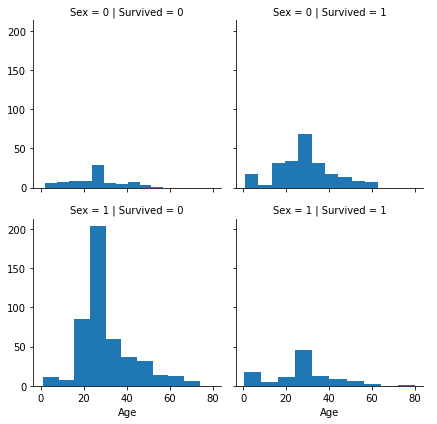

In [91]:
grid = sns.FacetGrid(df, row="Sex", col="Survived")
grid.map(plt.hist, "Age")
grid.add_legend()

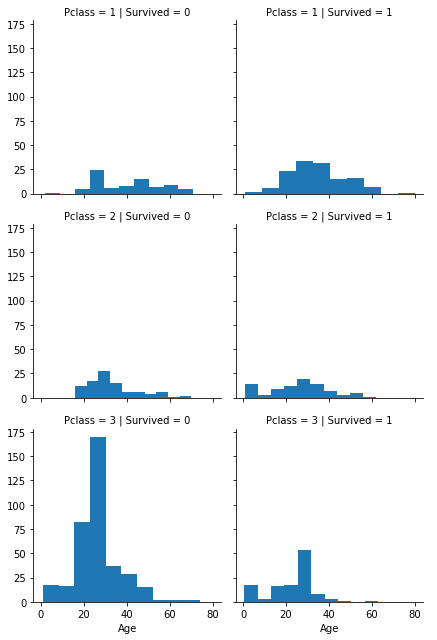

In [60]:
grid = sns.FacetGrid(df, row="Pclass", col="Survived")
grid.map(plt.hist, "Age")
grid.add_legend()

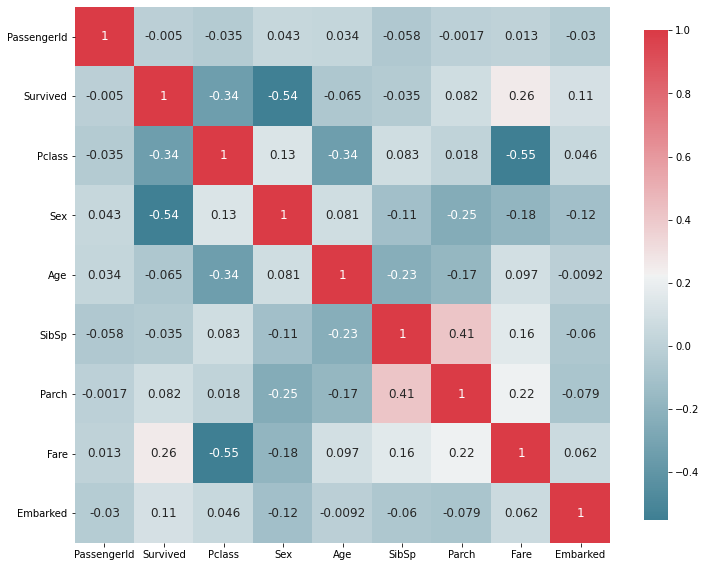

In [61]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

This plot shows the correlation between the independant features. The wormer is the color, the stronger is the positive linear relationship between the two variables. 

In [62]:
print(df[["Pclass","Survived","Age"]].groupby(["Survived","Pclass"],as_index=True).mean())


                       Age
Survived Pclass           
0        1       40.556250
         2       33.144330
         3       26.951613
1        1       34.609706
         2       25.998046
         3       22.747227


In [63]:
#df=df.drop(['Name'],axis=1)
df=df.drop(['Ticket'],axis=1)
df=df.drop(['Fare'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Embarked     891 non-null    int64  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


In [64]:
Title_list=[]
for n in range(891):
    s=str(df['Name'][n]).find(',')
    e=str(df['Name'][n]).find('.')
    ch=str(df['Name'][n])[s+2:e]
    Title_list.append(ch) 
df['Title']=Title_list
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,0,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,0,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,0,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,0,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,1,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,1,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,28.0,0,0,0,Mr


In [65]:
df=df.drop(['Name'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    int64  
 8   Title        891 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


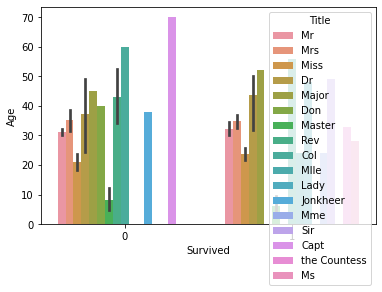

In [66]:
sns.barplot(y='Age',x='Survived',hue='Title',data=df);

In [67]:
Title_Dictionary = {

                    "Capt":       "Officer",
                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",
    
                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df.replace(Title_Dictionary,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,343,0,2,1,28.0,0,0,0,Mrs
1,76,0,3,1,25.0,0,0,0,Mrs
2,641,0,3,1,20.0,0,0,0,Mrs
3,568,0,3,0,29.0,0,4,0,Mrs
4,672,0,1,1,31.0,1,0,0,Mrs
...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,1,Mrs
887,61,0,3,1,22.0,0,0,1,Mrs
888,535,0,3,0,30.0,0,0,0,Miss
889,102,0,3,1,28.0,0,0,0,Mrs


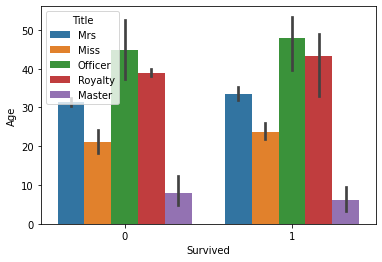

In [68]:
sns.barplot(y='Age',x='Survived',hue='Title',data=df);

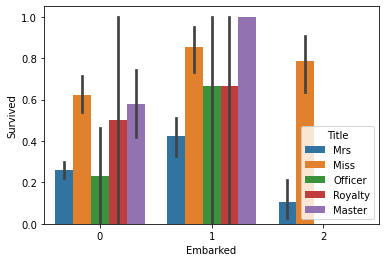

In [72]:
sns.barplot(y='Survived',x='Embarked',hue='Title',data=df);

In [69]:
family_list=[]
for n in range(891):
    tot=df['SibSp'][n]+df['Parch'][n]
    family_list.append(tot)
df['FamilySize']=family_list    
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize
0,343,0,2,1,28.0,0,0,0,Mrs,0
1,76,0,3,1,25.0,0,0,0,Mrs,0
2,641,0,3,1,20.0,0,0,0,Mrs,0
3,568,0,3,0,29.0,0,4,0,Mrs,4
4,672,0,1,1,31.0,1,0,0,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,1,Mrs,1
887,61,0,3,1,22.0,0,0,1,Mrs,0
888,535,0,3,0,30.0,0,0,0,Miss,0
889,102,0,3,1,28.0,0,0,0,Mrs,0


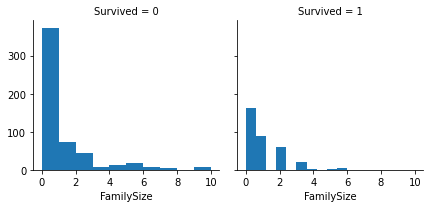

In [105]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'FamilySize')
g.add_legend()